In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape # 284807 개 , 31특성 

(284807, 31)

In [7]:
df.info() # 데이터 모두 float타입 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.Class.unique() # 1은 사기 0은 사기 아님 데이터 모두 0,1로 잘되있음

array([0, 1])

In [9]:
df.Class.value_counts() # 사기인경우 492번, 나머지 정상 

0    284315
1       492
Name: Class, dtype: int64

In [10]:
nf = df[df.Class==0] # 정상데이터만 따로 df
f = df[df.Class==1] #사기데이터만 따로 df

In [11]:
nf = nf.sample(738) # 정상이 너무 많으므로 사기데이터의 1.5배 만큼 랜덤 샘플한다.

In [13]:
data = f.append(nf,ignore_index=True) # data에는 60% 사기아닌것과 40% 사기 데이터가 있음

In [16]:
data.shape
X = data.drop(['Class'],axis=1) # 사기 결과만 빼서 X에
y=data['Class'] # 사기 결과 열만 따로 

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape,X_test.shape
# stratify 인자는 사기 데이터가 한쪽에 솔려서 분배되는것을 방지 

((984, 30), (246, 30))

In [19]:
# standardscaler 데이터의 최소, 최대 모를경우 사용
# robustscaler 이상치를 포함하는 데이터를 표준화하는경우
# minmax데이터의 최소, 최대 값을 알경우 normal 중에 
# standardscaler 사용
# 각 피처의 평균을 0 , 분산을 1로 변경 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # fit, transform 작업 적용
X_test=scaler.transform(X_test) # 테스트데이터에 적용해서 정규화 작업해주는경우는 transform만

In [22]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape)) #합성곱층 , 활성화 함수는 relu
model.add(BatchNormalization()) #배치 정규화 
model.add(Dropout(0.2)) # 드롭아웃 보통 0.2 , 0.5 , 0.5 줌

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [25]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 0s 15ms/step - loss: 0.7259 - accuracy: 0.6982 - val_loss: 0.5738 - val_accuracy: 0.8699
Epoch 2/20
31/31 [==============================] - 0s 7ms/step - loss: 0.3400 - accuracy: 0.8638 - val_loss: 0.4981 - val_accuracy: 0.8171
Epoch 3/20
31/31 [==============================] - 0s 7ms/step - loss: 0.3054 - accuracy: 0.8882 - val_loss: 0.4433 - val_accuracy: 0.8537
Epoch 4/20
31/31 [==============================] - 0s 7ms/step - loss: 0.2635 - accuracy: 0.9116 - val_loss: 0.3981 - val_accuracy: 0.8862
Epoch 5/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2426 - accuracy: 0.9106 - val_loss: 0.3565 - val_accuracy: 0.9024
Epoch 6/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2615 - accuracy: 0.9207 - val_loss: 0.3236 - val_accuracy: 0.9065
Epoch 7/20
31/31 [==============================] - 0s 7ms/step - loss: 0.2291 - accuracy: 0.9197 - val_loss: 0.2927 - val_accuracy: 0.9106
Epoch 8/20
31/31 [=

In [27]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

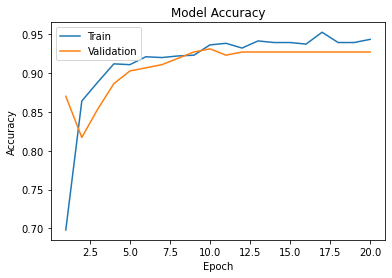

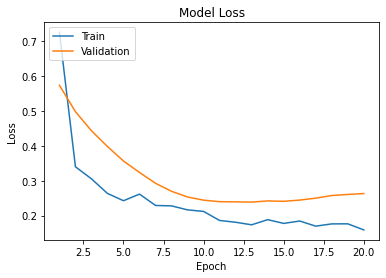

In [28]:
plotLearningCurve(history,20)